In [1]:
import pandas as pd
import numpy as np
import html5lib
from matplotlib import dates
from statsmodels.tsa.filters.hp_filter import hpfilter
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)
import requests

In [9]:
def data_preparation_for_general_df():
    headers = {'User-agent': 'Custom User Agent'}
    response = requests.get('https://www.worldometers.info/coronavirus/', headers=headers)
    tables = pd.read_html(response.text)
    general_df = tables[0]
    general_df['death_rate'] = general_df['TotalDeaths']/general_df['TotalCases']*100
    general_df.columns = ['Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'ActiveCases', 'Serious,Critical', 'CasesIn1Mil', 'DeathsIn1Mil',
       'death_rate']
    general_df3 = general_df.nlargest(15,'TotalCases')
    
    general_df2 = general_df3.groupby(['Country,Other', 'CasesIn1Mil']).agg({'death_rate': ['sum']})
    general_df2.columns = ['death_rate']
    general_df2 = general_df2.reset_index()
    
    general_df2.sort_values('death_rate',inplace=True)
    general_df2.rename(columns={"Country,Other": "Country", "death_rate": "Death Rate"}, inplace=True)
    
    return general_df, general_df2, general_df3

In [10]:
def plot_deat_rate(general_df2):
    ax=general_df2.plot.bar(x='Country', y=['Death Rate'], stacked=True, figsize=(12,5))
    x_offset = -0.2
    y_offset = 0.1
    for p in ax.patches:
        b = p.get_bbox()
        val = "{:.2f}".format(b.y1 + b.y0)        
        ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

In [11]:
general_dr, general_df2, general_df3 = data_preparation_for_general_df()

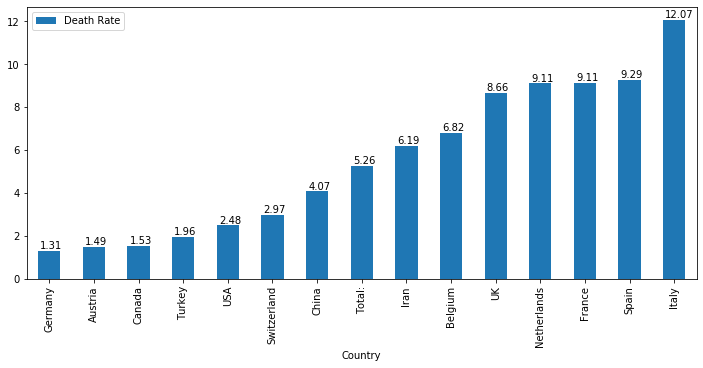

In [12]:
plot_deat_rate(general_df2)